# Visualizing and Analyzing Results

Once you've run an optimization, you need to understand the results. The `QuickResult` object provides several tools for this:

1. **Summary**: Quick text overview.
2. **Plotting**: Instant visualization of the Pareto front.
3. **Data Access**: Convert to pandas or numpy for custom analysis.
4. **Best Solution**: Helper to pick a single "best" implementation.

In [1]:
from vamos import run_nsgaii

# Run a quick experiment
result = run_nsgaii("zdt2", max_evaluations=5000, pop_size=100, seed=1)

## 1. Summary View
The `.summary()` method prints key stats including objective ranges and hypervolume.

In [2]:
result.summary()

=== VAMOS Quick Result ===
Algorithm: NSGAII
Solutions: 42
Objectives: 2
Evaluations: 5000
Seed: 1

Objective ranges:
  f1: [0.000000, 0.949109]
  f2: [0.596524, 1.726084]

Hypervolume (auto ref): 0.838237


## 2. Built-in Plotting
The `.plot()` method handles 2D and 3D plotting automatically.

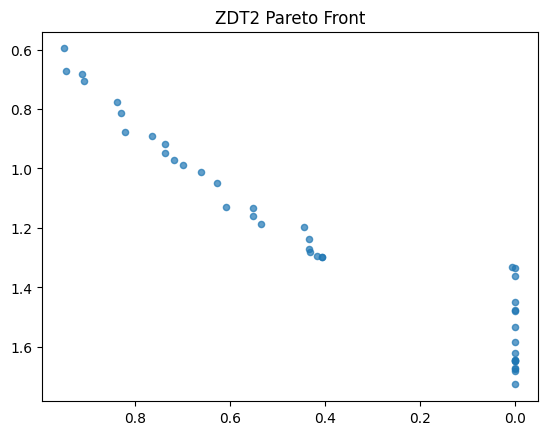

<Axes: title={'center': 'ZDT2 Pareto Front'}>

In [3]:
result.plot(title="ZDT2 Pareto Front")

## 3. Picking a "Best" Solution
Multi-objective optimization returns a set of trade-offs. You often need to pick just one.
The `.best()` method supports simplistic strategies like 'knee' (closest to Utopia point).

In [4]:
# Get the knee point
knee = result.best("knee")
print("Knee point objectives:", knee["F"])

# Get solution minimizing objective 1
min_f1 = result.best("min_f1")
print("Min F1 objectives:  ", min_f1["F"])

Knee point objectives: [1.15993415e-03 1.33327343e+00]
Min F1 objectives:   [1.87463901e-09 1.72608446e+00]


## 4. Export to DataFrame
If you have `pandas` installed, you can export the results for deeper analysis.

In [5]:
try:
    df = result.to_dataframe()
    print(df.head())
    print("\nstats:")
    print(df.describe())
except ImportError:
    print("Pandas not installed.")

             f1        f2            x1        x2        x3        x4  \
0  4.339464e-09  1.644096  4.339464e-09  0.069763  0.024289  0.157360   
1  1.874639e-09  1.726084  1.874639e-09  0.020185  0.023519  0.160837   
2  5.516829e-01  1.159130  5.516829e-01  0.102959  0.055936  0.159116   
3  5.359791e-01  1.186431  5.359791e-01  0.046250  0.020758  0.159150   
4  9.084085e-01  0.706147  9.084085e-01  0.012817  0.007294  0.078745   

         x5        x6        x7        x8  ...       x21       x22       x23  \
0  0.077487  0.038518  0.088622  0.037074  ...  0.013656  0.047060  0.088321   
1  0.127151  0.040626  0.092803  0.008915  ...  0.014814  0.095925  0.040106   
2  0.008902  0.006697  0.068745  0.043176  ...  0.012998  0.043321  0.002814   
3  0.006661  0.005274  0.081882  0.016227  ...  0.012866  0.064822  0.002047   
4  0.002597  0.001547  0.086664  0.064651  ...  0.031726  0.041283  0.015992   

        x24       x25       x26       x27       x28       x29       x30  
0  0.0